In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
color_map = dict(zip(['Z', 'R', 'O', 'Y', 'G', 'C', 'B', 'V', 'S', 'K'],
                     ['black', 'red', 'orange', 'yellow', 'springgreen', 'cyan', 'blue', 'violet', 'lime', 'darkorange']))

@np.vectorize
def convert(c):
    return color_map[c]

In [80]:
def read(file, reverse=False, zero=True, maxes=True):
    data = pd.read_csv(file, sep=' ', comment='#', header=None)
    if reverse: data = data.reindex(index=data.index[::-1]); data = data.reset_index(drop=True)
    data[1] += data[2]/60
   # print(data[0])
    if maxes:
        data[2] = data[0].apply(lambda t: t[1])
    else:
        del data[2]
    data[0] = data[0].apply(lambda t: t[0])
    
    if zero:
        data[1] -= data[1][0]
        data = data.drop(index=0)
    return data

def calculate_averages(data):
    #data = np.array(data)
    s = set(data[0])
    a = {}
    for c in s:
        a[c] = np.average(np.abs(data[np.logical_and((data[0] == c), (data[1] == data[1]))][1]))
    return a

In [81]:
data3[data3[0] == 'R'][1], calculate_averages(data)

(3     17.883333
 14   -17.983333
 Name: 1, dtype: float64,
 {'R': 18.058333333333337,
  'B': 16.855555555555554,
  'Y': 22.73888888888889,
  'V': 18.137499999999996,
  'O': 25.983333333333334,
  'C': 19.133333333333344,
  'G': 24.35833333333334})

In [13]:
@np.vectorize
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 750:
        A = 1.
    else:
        A=0.5
    if wavelength < 380:
        wavelength = 380.
    if wavelength >750:
        wavelength = 750.
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

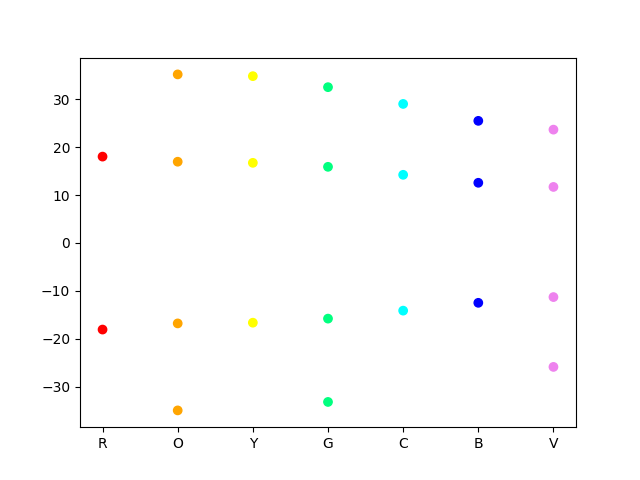

In [5]:
data = read('HG.txt')
data2 = read('HG_2.txt', reverse=True)
%matplotlib widget
plt.scatter(data[0], data[1], c=convert(data[0]))
plt.show()

    0          1  2
1   R  18.166667  1
2   O  16.766667  1
3   Y  16.716667  1
4   G  15.800000  1
5   C  14.166667  1
6   B  12.500000  1
7   V  11.666667  1
8   O  35.616667  2
9   Y  35.416667  2
10  G  33.250000  2
11  C  29.583333  2
12  B  25.733333  2
13  V  23.750000  2
14  O -35.333333  2
15  Y -35.166667  2
16  G -33.016667  2
17  C -29.500000  2
18  B -25.900000  2
19  V -23.933333  2
20  R -18.066667  1
21  O -16.933333  1
22  Y -16.766667  1
23  G -15.950000  1
24  C -14.116667  1
25  B -12.633333  1
26  V -11.650000  1


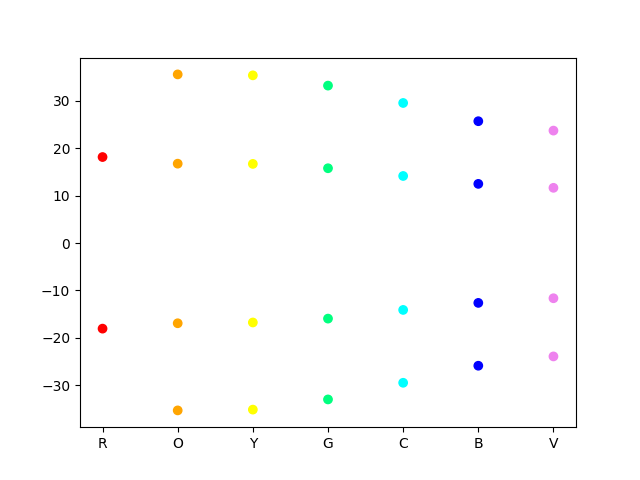

In [6]:
%matplotlib widget
plt.scatter(data2[0], data2[1], c=convert(data2[0]))
print(data2)
plt.show()

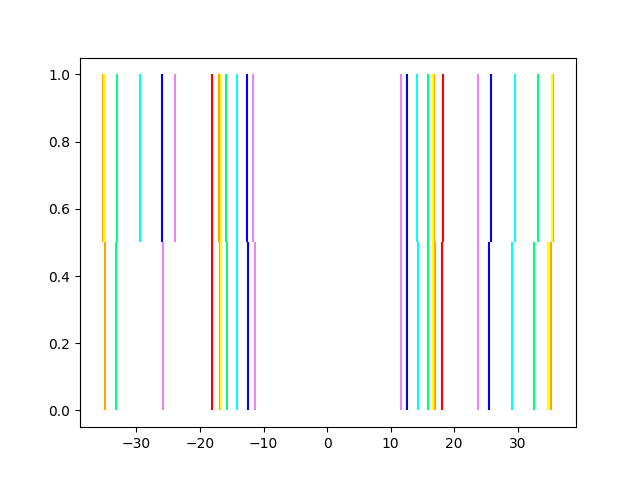

In [38]:
data1 = read('HG.txt')

%matplotlib widget
plt.vlines(data1[1], 0, 0.5, colors=convert(data1[0]))
plt.vlines(data2[1], 0.5, 1, colors=convert(data2[0]))
#plt.scatter(data2[1], np.zeros(len(data2[1])), c=convert(data2[0]), s=3)
#plt.scatter(data1[1], np.ones(len(data1[1])), c=convert(data1[0]), s=3)
plt.show()

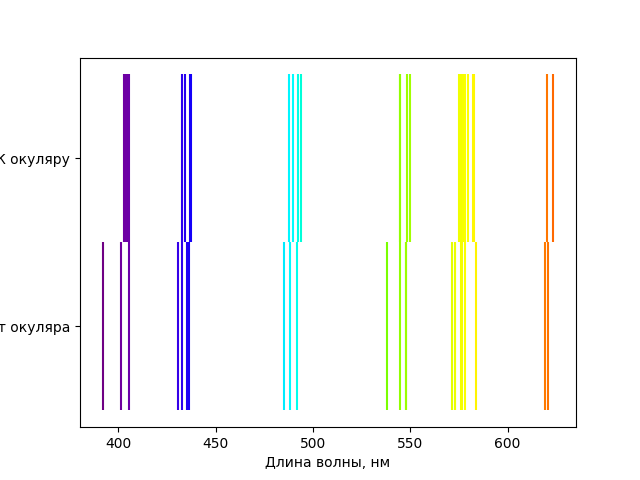

In [41]:

%matplotlib widget
fig, ax = plt.subplots()
#sax = ax.secondary_yaxis('right')
ax.set_yticks([0.25, 0.75], ['От окуляра','К окуляру'])
ax.set_xlabel("Длина волны, нм")
d1 = np.round(np.sin(np.radians(np.abs(data[1])))*(1e-3/500)/np.array(data[2],dtype=float)/1e-9, 2)

plt.vlines(d1, 0, 0.5, colors=np.array(wavelength_to_rgb(d1)).swapaxes(0,1))

d2 = np.round(np.sin(np.radians(np.abs(data2[1])))*(1e-3/500)/np.array(data2[2],dtype=float)/1e-9, 2)
plt.vlines(d2, 0.5, 1.0, colors=np.array(wavelength_to_rgb(d2)).swapaxes(0,1))


In [9]:
read('HG_PR.txt', zero=False, maxes=False)

,0,1
0,R,211.166667
1,O,210.633333
2,G,210.366667
3,C,209.716667
4,B,208.733333
5,V,207.683333
6,R,370.166667
7,Y,307.400000
8,G,307.866667
9,C,308.600000


In [10]:
data3 = read('Na.txt', reverse=True)

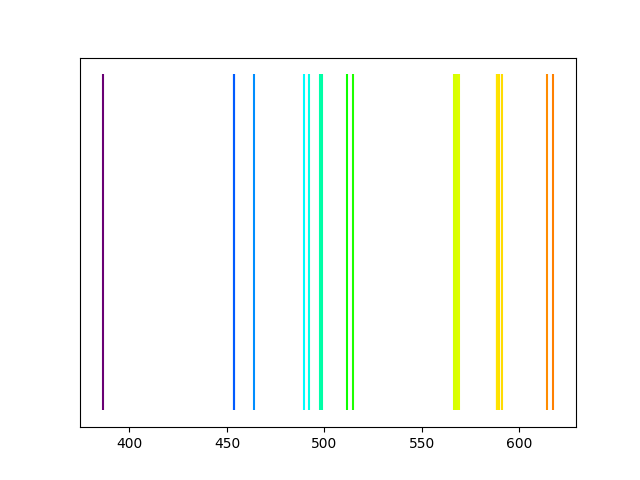

In [45]:

%matplotlib widget
fig, ax = plt.subplots()
d3 = np.round(np.sin(np.radians(np.abs(data3[1])))*(1e-3/500)/np.array(data3[2],dtype=float)/1e-9, 2)
#sax = ax.secondary_yaxis('right')
#ax.set_yticks([0.25, 0.75], ['Left','Right'])
ax.set_yticks([])
plt.vlines(d3, 0, 0.5, colors=np.array(wavelength_to_rgb(d3)).swapaxes(0,1))#convert(data3[0]))

C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\andr\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in longlong_scalars
  ret = ret / rcount


{'R': nan,
 'B': nan,
 'S': nan,
 'V': nan,
 'G': nan,
 'O': nan,
 'C': nan,
 'K': nan,
 'Y': nan}

In [48]:
data3

,0,1,2
1,S,34.583333,2
2,O,36.050000,2
3,R,17.883333,1
4,K,17.150000,1
5,O,17.116667,1
6,Y,16.450000,1
7,S,14.816667,1
8,G,14.416667,1
9,C,14.166667,1
10,B,13.116667,1
